# COVID-19 situation update worldwide

# By Mwanje Musa 12/06/2022

In [1]:
!pip install lxml

In [2]:
import requests
import lxml.html as lh
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
covid_data ='https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases'

page =requests.get(covid_data)

doc = lh.fromstring(page.content)

tr_elements = doc.xpath('//tr')

[len(T) for T in tr_elements[:12]]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [7]:
#check the table header

tr_elements = doc.xpath('//tr')

col = []
i = 0

for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))


1:Region
2:Places reporting cases
3:Sum of Cases
4:Sum of Deaths
5:Confirmed cases during the 14-days
			of the reporting  period 
6:Reporting period
			YYYY-WW


In [13]:
#Check the data in other rows
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=6: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

In [14]:
#To see the No of Rows and Columns
[len(C) for (title,C) in col]

[224, 224, 224, 224, 224, 224]

In [15]:
#Create a dataframe and read the file
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

In [16]:
df.head()

,Region,Places reporting cases,Sum of Cases,Sum of Deaths,Confirmed cases during the 14-days\n\t\t\tof the reporting period,Reporting period\n\t\t\tYYYY-WW
0,Africa,Algeria,265897,6875,56,2022-21 and 2022-22
1,,Angola,99761,1900,328,2022-21 and 2022-22
2,,Benin,26952,163,0,2022-21 and 2022-22
3,,Botswana,306716,2703,0,2022-21 and 2022-22
4,,Burkina_Faso,20899,384,0,2022-21 and 2022-22


In [17]:
df.tail()

,Region,Places reporting cases,Sum of Cases,Sum of Deaths,Confirmed cases during the 14-days\n\t\t\tof the reporting period,Reporting period\n\t\t\tYYYY-WW
219,,Tuvalu,3,0,0,2022-21 and 2022-22
220,,Vanuatu,10061,14,1379,2022-21 and 2022-22
221,,Wallis_and_Futuna,454,7,0,2022-21 and 2022-22
222,Other,Cases_on_an_international_conveyance_Japan,705,6,0,2022-21 and 2022-22
223,Total,,531470423,6318391,6705497,


In [18]:
df.shape

(224, 6)

In [19]:
#Remove row 0
dfc =df.drop([df.index[0]])
dfc.head()

,Region,Places reporting cases,Sum of Cases,Sum of Deaths,Confirmed cases during the 14-days\n\t\t\tof the reporting period,Reporting period\n\t\t\tYYYY-WW
1,,Angola,99761,1900,328,2022-21 and 2022-22
2,,Benin,26952,163,0,2022-21 and 2022-22
3,,Botswana,306716,2703,0,2022-21 and 2022-22
4,,Burkina_Faso,20899,384,0,2022-21 and 2022-22
5,,Burundi,42248,15,642,2022-21 and 2022-22


In [20]:
dfc.dtypes

Region                                                                 object
Places reporting cases                                                 object
Sum of Cases                                                           object
Sum of Deaths                                                          object
Confirmed cases during the 14-days\n\t\t\tof the reporting  period     object
Reporting period\n\t\t\tYYYY-WW                                        object
dtype: object

# Plot Chars and Graphs

Text(0.5, 1.0, 'Confirmed cases per Region for Period of 2022-21 and 2022-22')

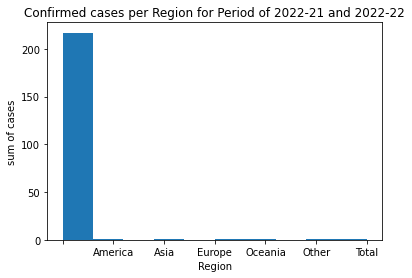

In [65]:
plt.pyplot.hist(dfc["Region"])

# set x/y labels and plot title
plt.pyplot.xlabel("Region")
plt.pyplot.ylabel("sum of cases")
plt.pyplot.title("Confirmed cases per Region for Period of 2022-21 and 2022-22")

Text(0.5, 1.0, 'Distribution of COVID-19 deaths, worldwide, as of week 22 2022')

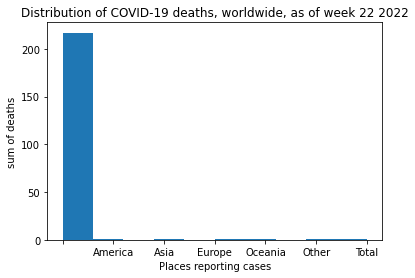

In [66]:
plt.pyplot.hist(dfc["Region"])
plt.pyplot.xlabel("Places reporting cases")
plt.pyplot.ylabel("sum of deaths")
plt.pyplot.title("Distribution of COVID-19 deaths, worldwide, as of week 22 2022")